 # News Articles Analysis 

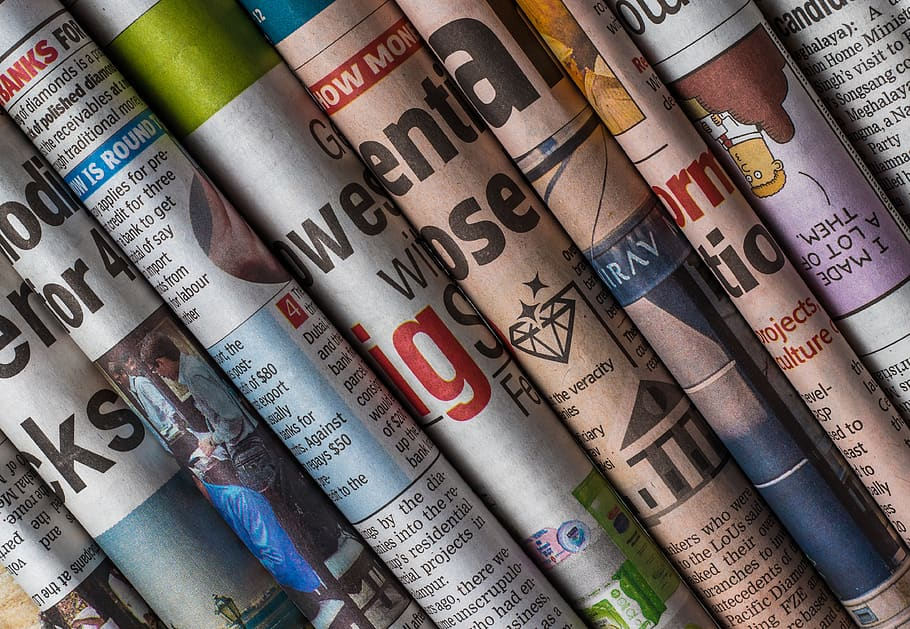

<a id="cont"></a>

### <span style="color:#0077be"><b> Table of Contents
* <b>[1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
    * [1.2 Objectives](#section_1_2)
    * [1.3 Importing Packages](#section_1_3)
    * [1.4 Loading Data](#section_1_4)
* <b>[2. Data Cleaning](#chapter2)
    * [2.1 Train Data Cleaning](#section_2_1)
        * [2.1.1 Removing stopwords](#subsection_2_1_1)
        * [2.1.2 Removing punctuation](#subsection_2_1_2)
        * [2.1.3 Removing noise](#subsection_2_1_3)
        * [2.1.4 Tokenization](#subsection_2_1_4)
        * [2.1.5 Stemming](#subsection_2_1_5)
        * [2.1.6 Lemmatization](#subsection_2_1_6)
        * [2.1.7 Removing emojis](#subsection_2_1_7)
        * [2.1.8 Finding frequent words](#subsection_2_1_8)
    * [2.2 Test Data Cleaning](#section_2_2)
        * [2.2.1 Removing stopowrds](#subsection_2_2_1)
        * [2.2.2 Removing noise](#subsection_2_2_2)
        * [2.2.3 Removing punctuation](#subsection_2_2_3)
        * [2.2.4 Removing emojis](#subsection_2_2_4)
        * [2.2.5 Tokenization](#subsection_2_2_5)
        * [2.2.6 Stemming](#subsection_2_2_6)
        * [2.2.7 Lemmatization](#subsection_2_2_7)
        * [2.2.8 Finding frequent words](#subsection_2_2_8)   
* <b>[3. Exploratory Data Analysis (EDA)](#chapter3)
* <b>[4. Data Preproccessing and Model Training](#chapter4)
* <b>[5. Model Tuning](#chapter5)
* <b>[6. Conclusion](#chapter6)</b>
* <b>[7. References](#chapter7)

## <span style="color:#0077be"><b> 1. Project Overview 

<a id="section_1_1"></a>
## 1.1. Introduction 
>Our group has been tasked with this project to create classification models using Python and deploy it as a web application with Streamlit. 
The aim is to provide you with a hands-on demonstration of applying machine learning techniques to natural language processing tasks.  This end-to-end project encompasses the entire workflow, including data loading, preprocessing, model training, evaluation, and final deployment. The primary stakeholders for the news classification project for the news outlet could include the editorial team, IT/tech support, management, readers, etc. These groups are interested in improved content categorization, operational efficiency, and enhanced user experience.

## 1.2. Objectives <a class="anchor" id="section_1_2"></a>
>Streamlined Workflow: Create an end-to-end machine learning workflow that includes data loading, preprocessing, model training, evaluation, and deployment to streamline the process for data scientists and engineers.

>Accurate Classification: Develop and deploy machine learning models that accurately classify news articles into predefined categories to assist the editorial team in better organizing and managing content.

>Hands-On Learning: Provide a comprehensive, hands-on demonstration of applying natural language processing (NLP) and machine learning techniques to real-world data, facilitating learning and skill development for the team.

>Significantly enhance the efficiency and effectiveness of the news outlet's content management and delivery, benefiting all primary stakeholders involved.

## 1.3. Importing Packages <a class="anchor" id="chapter2"></a>
#### We import necessary packages for data manipulation and analysis
+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.


In [1]:
# Importing packages for data manipulation and analysis
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.svm import SVC
from collections import Counter
# import contractions
# from langdetect import detect
#from textblob import TextBlob
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
from sklearn.model_selection import GridSearchCV


# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

### Downloading NLTK corpora
>NLTK – Natural Language Toolkit – is a widely used library for building Python programs to work with human language data. It provides interfaces to numerous corpora and lexical resources, such as WordNet, along with a suite of text-processing libraries for classification, tokenisation, stemming, tagging, parsing, and semantic reasoning.

In [2]:
# Necessary Libraries
import nltk
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## 1.4. Loading Data <a class="anchor" id="chapter3"></a>
>We load our respectice datasets; the *'train_data'* and *'test_data'* csv files to Pandas dataframes 

In [3]:
# loading dataset
train_df = pd.read_csv("Data\\train.csv")

test_df = pd.read_csv("Data\\test.csv")


>To prevent any major unnecessary changes occurring to the original data , a copy of the dataframe was made using the df.copy() method and referred to as df_copy for both dataframes respectively

In [4]:
# The copy of the dataframe
train_df_copy = train_df.copy()

test_df_copy = test_df.copy()

## <span style="color:#0077be"><b> 2. DATA CLEANING <a class="anchor" id="chapter4"></a>
>Clean data ensures that machine learning models are trained on accurate and relevant information, which improves their predictive performance and reliability.

Check for the columns in the Dataframe and Shape

In [5]:
# Check the columns of the DataFrame
print(train_df_copy.columns)


Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')


In [6]:
# Check the columns of the DataFrame
print(test_df_copy.columns)

Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')


In [7]:
train_df_copy.shape

(5520, 5)

In [8]:
test_df_copy.shape

(2000, 5)

In [9]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB


In [10]:
test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB


### 2.1 Check for Missing, Unique Values and Duplicates

In [11]:
# Checking for duplicates
duplicates = train_df_copy.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [12]:
# Checking for duplicates
duplicates = test_df_copy.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [13]:
# Check for Unique Values
unique_values = train_df_copy.nunique()
print(f"\nUnique Values:\n{unique_values}")


Unique Values:
headlines      5512
description    5508
content        5513
url            5514
category          5
dtype: int64


In [14]:
# Check for Unique Values
unique_values = test_df_copy.nunique()
print(f"\nUnique Values:\n{unique_values}")


Unique Values:
headlines      2000
description    2000
content        2000
url            2000
category          5
dtype: int64


In [15]:
# Check for Missing Values/Nulls
missing_values = train_df_copy.isnull().sum()
print(f"\nMissing Values:\n{missing_values}")


Missing Values:
headlines      0
description    0
content        0
url            0
category       0
dtype: int64


In [16]:
# Check for Missing Values/Nulls
missing_values = test_df_copy.isnull().sum()
print(f"\nMissing Values:\n{missing_values}")


Missing Values:
headlines      0
description    0
content        0
url            0
category       0
dtype: int64


### 2.2 Removing stop words
>Stop words are words that do not contain important significance to be used in search queries. Usually, these words are filtered out from search queries because they return a vast amount of unnecessary information. 

In [17]:
#We print out the stopwords for English
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
#We define a function to remove stopwords from a text
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split() 
        filtered_words = [word for word in words if word.lower() not in stopwords_list]
        return ' '.join(filtered_words)
    else:
        return text

In [19]:
# Apply the remove_stopwords function to all cells in the DataFrame
train_df_copy = train_df_copy.applymap(remove_stopwords)

In [20]:
#Apply function to the dataframe
test_df_copy = test_df_copy.applymap(remove_stopwords)

In [21]:
#Showing the dataframe without stopwords
print("\nData without stopwords:")
train_df_copy.head()


Data without stopwords:


,headlines,description,content,url,category
0,RBI revises definition politically-exposed per...,central bank also asked chairpersons chief exe...,Reserve Bank India (RBI) changed definition Po...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% Rs 5.55 crore i...,NDTV's consolidated revenue operations Rs 95.5...,Broadcaster New Delhi Television Ltd Monday re...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, grow much faster...",initial share sale open public subscription Ju...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,current account deficit (CAD) 3.8 per cent GDP...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars 7.68%, highest far...",prices shot reflecting overall higher risk ave...,States forced pay nose weekly auction debt Tue...,https://indianexpress.com/article/business/eco...,business


### 2.3 Remove punctuation
#### We remove punctuation signs to minimise or remove noise from the dataset

#### First we make all the text lowercase to remove some noise from capitalisation.

In [22]:
# Function to convert to lowercase
train_df_copy = train_df_copy.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [23]:
# Function to convert to lowercase
test_df_copy = test_df_copy.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [24]:
#We show the dataframe without punctuation
print("\nData without punctuation:")
train_df_copy.head()



Data without punctuation:


,headlines,description,content,url,category
0,rbi revises definition politically-exposed per...,central bank also asked chairpersons chief exe...,reserve bank india (rbi) changed definition po...,https://indianexpress.com/article/business/ban...,business
1,ndtv q2 net profit falls 57.4% rs 5.55 crore i...,ndtv's consolidated revenue operations rs 95.5...,broadcaster new delhi television ltd monday re...,https://indianexpress.com/article/business/com...,business
2,"akasa air ‘well capitalised’, grow much faster...",initial share sale open public subscription ju...,homegrown server maker netweb technologies ind...,https://indianexpress.com/article/business/mar...,business
3,india’s current account deficit declines sharp...,current account deficit (cad) 3.8 per cent gdp...,india’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"states borrowing cost soars 7.68%, highest far...",prices shot reflecting overall higher risk ave...,states forced pay nose weekly auction debt tue...,https://indianexpress.com/article/business/eco...,business


#### Now let's remove the punctuation using the `string` import.

In [25]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [26]:
##Defining a cleaning function
def remove_punctuation(text):
    if isinstance(text, str):  # Check if the cell contains a string
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

In [27]:
#Apply the function to the dataframe
train_df_copy = train_df_copy.applymap(remove_punctuation)

In [28]:
#Apply the function to the dataframe
test_df_copy = test_df_copy.applymap(remove_punctuation)

In [29]:
print("\nCleaned Data without punctuation:")
test_df_copy.head()


Cleaned Data without punctuation:


,headlines,description,content,url,category
0,nlc india wins contract power supply rajasthan...,stateowned firm nlc india ltd nlcil monday sai...,stateowned firm nlc india ltd nlcil monday sai...,httpsindianexpresscomarticlebusinesscompaniesn...,business
1,sbi clerk prelims exams dates announced admit ...,sbi clerk prelims exam sbi clerk prelims exam ...,sbi clerk prelims exam state bank indian sbi a...,httpsindianexpresscomarticleeducationsbiclerkp...,education
2,golden globes michelle yeoh ferrell angela bas...,barbie top nominee year followed closely oppen...,michelle yeoh ferrell angela bassett amanda se...,httpsindianexpresscomarticleentertainmentholly...,entertainment
3,oneplus nord 3 rs 27999 part new price cut here’s,new deal makes oneplus nord 3 easy purchase rs...,review oneplus nord 3 5g praised balanced comb...,httpsindianexpresscomarticletechnologytechnews...,technology
4,adani family’s partners used ‘opaque’ funds in...,citing review files multiple tax havens intern...,millions dollars invested publicly traded stoc...,httpsindianexpresscomarticlebusinessadanifamil...,business


### 2.4 Removing noise
>In text analytics, removing noise (i.e. unnecessary information) is a key part of getting the data into a usable format.

In [30]:
train_df_copy['url'] = 'urlweb'

test_df_copy['url'] = 'urlweb'

In [31]:
print("\n Showing refined data:")
test_df_copy.head()


 Showing refined data:


,headlines,description,content,url,category
0,nlc india wins contract power supply rajasthan...,stateowned firm nlc india ltd nlcil monday sai...,stateowned firm nlc india ltd nlcil monday sai...,urlweb,business
1,sbi clerk prelims exams dates announced admit ...,sbi clerk prelims exam sbi clerk prelims exam ...,sbi clerk prelims exam state bank indian sbi a...,urlweb,education
2,golden globes michelle yeoh ferrell angela bas...,barbie top nominee year followed closely oppen...,michelle yeoh ferrell angela bassett amanda se...,urlweb,entertainment
3,oneplus nord 3 rs 27999 part new price cut here’s,new deal makes oneplus nord 3 easy purchase rs...,review oneplus nord 3 5g praised balanced comb...,urlweb,technology
4,adani family’s partners used ‘opaque’ funds in...,citing review files multiple tax havens intern...,millions dollars invested publicly traded stoc...,urlweb,business


### 2.5 Tokenization
>A tokeniser divides text into a sequence of tokens, which roughly correspond to "words". We will use tokenisers to clean up the data, making it ready for analysis.
>Text Simplification:By breaking down text into tokens, it becomes easier to manage and analyze, as each token can be individually processed and analyzed.
>Tokenization standardizes text into a consistent format, enabling more straightforward comparisons and operations across different texts.

In [32]:
def tokenize_text(text):
    if isinstance(text, str):
        return ' '.join(word_tokenize(text))
    return text

train_df_copy = train_df_copy.apply(tokenize_text)


In [33]:
def tokenize_text(text):
    if isinstance(text, str):
        return ' '.join(word_tokenize(text))
    return text

test_df_copy = test_df_copy.apply(tokenize_text)

In [34]:
print("\n Showing tokenized data:")
train_df_copy.head()


 Showing tokenized data:


,headlines,description,content,url,category
0,rbi revises definition politicallyexposed pers...,central bank also asked chairpersons chief exe...,reserve bank india rbi changed definition poli...,urlweb,business
1,ndtv q2 net profit falls 574 rs 555 crore impa...,ndtvs consolidated revenue operations rs 9555 ...,broadcaster new delhi television ltd monday re...,urlweb,business
2,akasa air ‘well capitalised’ grow much faster ...,initial share sale open public subscription ju...,homegrown server maker netweb technologies ind...,urlweb,business
3,india’s current account deficit declines sharp...,current account deficit cad 38 per cent gdp us...,india’s current account deficit declined sharp...,urlweb,business
4,states borrowing cost soars 768 highest far fi...,prices shot reflecting overall higher risk ave...,states forced pay nose weekly auction debt tue...,urlweb,business


### 2.6 Lemmatization 
>Lemmatizing is a more sophisticated process that reduces words to their base or dictionary form, known as the lemma. It considers the context and part of speech of the word to ensure that the base form is a valid word. Lemmatization typically involves looking up a word in a dictionary and uses morphological analysis to determine the correct lemma.

>Meaning Preservation: Maintains the meaning and grammatical integrity of words.

In [35]:
# Lemmatization function
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    if isinstance(text, str):
        return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [36]:
#Apply the function to the dataframe
train_df_copy = train_df_copy.applymap(lemmatize_text)

In [37]:
#Apply the function to the dataframe
test_df_copy = test_df_copy.applymap(lemmatize_text)

In [38]:
print("\nLemmatized Data:")
test_df_copy.head()


Lemmatized Data:


,headlines,description,content,url,category
0,nlc india win contract power supply rajasthan ...,stateowned firm nlc india ltd nlcil monday sai...,stateowned firm nlc india ltd nlcil monday sai...,urlweb,business
1,sbi clerk prelim exam date announced admit car...,sbi clerk prelim exam sbi clerk prelim exam 20...,sbi clerk prelim exam state bank indian sbi an...,urlweb,education
2,golden globe michelle yeoh ferrell angela bass...,barbie top nominee year followed closely oppen...,michelle yeoh ferrell angela bassett amanda se...,urlweb,entertainment
3,oneplus nord 3 r 27999 part new price cut here’s,new deal make oneplus nord 3 easy purchase r 30k,review oneplus nord 3 5g praised balanced comb...,urlweb,technology
4,adani family’s partner used ‘opaque’ fund inve...,citing review file multiple tax haven internal...,million dollar invested publicly traded stock ...,urlweb,business


### 2.7 Removing emojis
>Emojis are often used in text to convey emotions or sentiments but can be irrelevant or distracting for certain NLP tasks.

>Removing emojis can be a crucial step in data preprocessing to ensure that the text is clean and standardized. 

In [39]:
#We define a function to remove emojis from the strings
def remove_emojis(text):
    if isinstance(text, str):  # Check if the cell contains a string
        # Define a regex pattern for emojis
        emoji_pattern = re.compile(
            "[" 
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "\U00002702-\U000027B0"
            "\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return text

In [40]:
#We apply the function to the entire dataframe
train_df_copy.applymap(remove_emojis)

test_df_copy.applymap(remove_emojis)

print("\nCleaned Data without emojis:")
train_df_copy.head()


Cleaned Data without emojis:


,headlines,description,content,url,category
0,rbi revise definition politicallyexposed perso...,central bank also asked chairperson chief exec...,reserve bank india rbi changed definition poli...,urlweb,business
1,ndtv q2 net profit fall 574 r 555 crore impact...,ndtvs consolidated revenue operation r 9555 cr...,broadcaster new delhi television ltd monday re...,urlweb,business
2,akasa air ‘well capitalised’ grow much faster ...,initial share sale open public subscription ju...,homegrown server maker netweb technology india...,urlweb,business
3,india’s current account deficit decline sharpl...,current account deficit cad 38 per cent gdp us...,india’s current account deficit declined sharp...,urlweb,business
4,state borrowing cost soar 768 highest far fiscal,price shot reflecting overall higher risk aver...,state forced pay nose weekly auction debt tues...,urlweb,business


#### <a href=#cont>Back to Table of Contents</a>

---

## <span style="color:#0077be"><b>5.Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>

In [41]:
train_df_copy.head()

,headlines,description,content,url,category
0,rbi revise definition politicallyexposed perso...,central bank also asked chairperson chief exec...,reserve bank india rbi changed definition poli...,urlweb,business
1,ndtv q2 net profit fall 574 r 555 crore impact...,ndtvs consolidated revenue operation r 9555 cr...,broadcaster new delhi television ltd monday re...,urlweb,business
2,akasa air ‘well capitalised’ grow much faster ...,initial share sale open public subscription ju...,homegrown server maker netweb technology india...,urlweb,business
3,india’s current account deficit decline sharpl...,current account deficit cad 38 per cent gdp us...,india’s current account deficit declined sharp...,urlweb,business
4,state borrowing cost soar 768 highest far fiscal,price shot reflecting overall higher risk aver...,state forced pay nose weekly auction debt tues...,urlweb,business


## 5.1 Ploting the most frequent words

In [42]:
def get_word_frequency(text):
    words = text.split()
    return Counter(words)

In [43]:
# Get combined text for each column
headlines_text = ' '.join(train_df_copy['headlines'])
description_text = ' '.join(train_df_copy['description'])
content_text = ' '.join(train_df_copy['content'])

In [44]:
# Getting word frequency for each column
headlines_freq = get_word_frequency(headlines_text)
description_freq = get_word_frequency(description_text)
content_freq = get_word_frequency(content_text)

In [45]:
# Convert frequency dictionaries to DataFrames for easier visualization
headlines_freq_df = pd.DataFrame(headlines_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
description_freq_df = pd.DataFrame(description_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
content_freq_df = pd.DataFrame(content_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

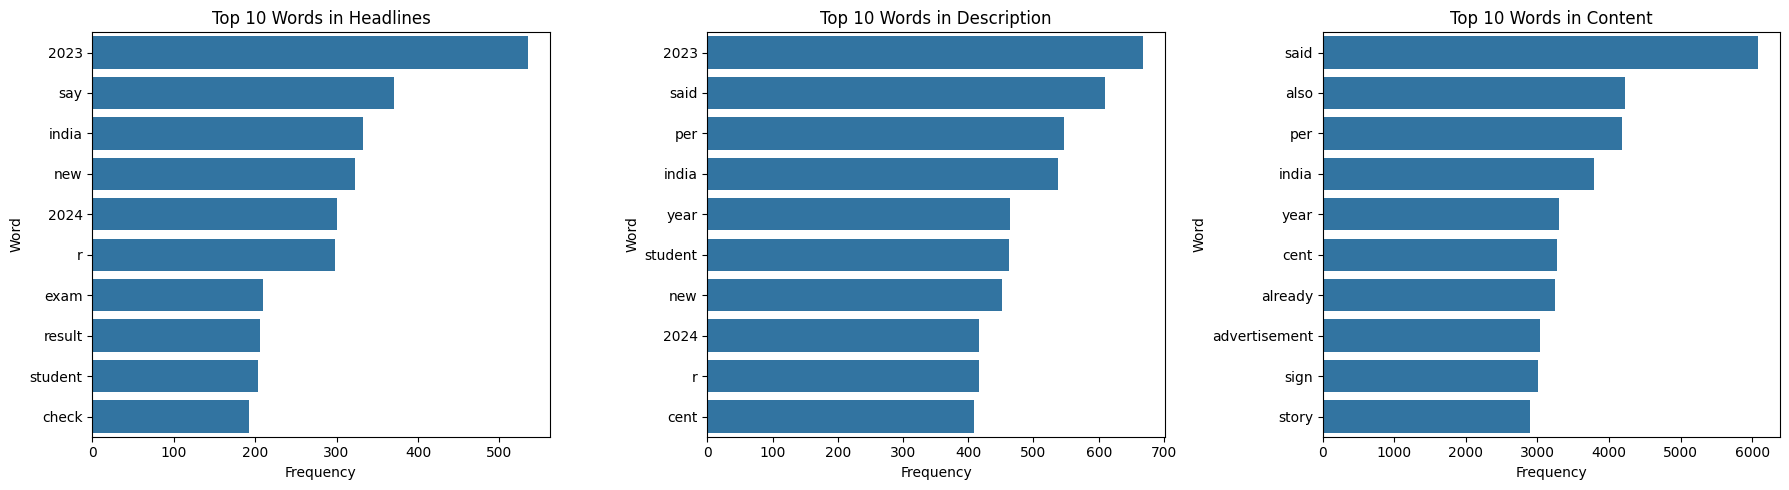

In [46]:
# Visualize the top 10 most frequent words in each column
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Frequency', y='Word', data=headlines_freq_df.head(10))
plt.title('Top 10 Words in Headlines')

plt.subplot(1, 3, 2)
sns.barplot(x='Frequency', y='Word', data=description_freq_df.head(10))
plt.title('Top 10 Words in Description')

plt.subplot(1, 3, 3)
sns.barplot(x='Frequency', y='Word', data=content_freq_df.head(10))
plt.title('Top 10 Words in Content')

plt.tight_layout()
plt.show()

## 5.2 Distribution of Categories
#### This count plot shows the frequency of each category in the dataset.

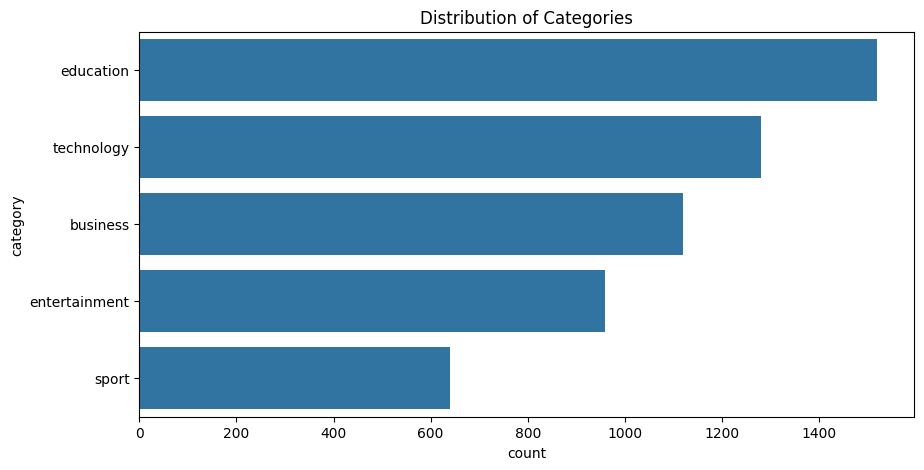

In [47]:
# Plotting the distribution of categories
plt.figure(figsize=(10, 5))
sns.countplot(y='category', data=train_df_copy, order=train_df_copy['category'].value_counts().index)
plt.title('Distribution of Categories')
plt.show()

The bar plot effectively shows the comparative distribution of articles across the categories.

**Distribution:**

-Education has the highest number of articles, with the count slightly above 1400.

-Technology comes next, with a count around 1200.

-Business follows, with a count close to 1100.

-Entertainment has fewer articles, with a count just under 1000.

-Sports has the least number of articles, with a count around 600.

**Insights:**

The plot indicates that education is the most covered topic in the dataset, followed by technology and business.
Entertainment and sports are less frequently covered compared to the other categories.

## 5.3 Word Cloud
#### Word cloud visualizing the most frequent words in the headlines of different news categories.

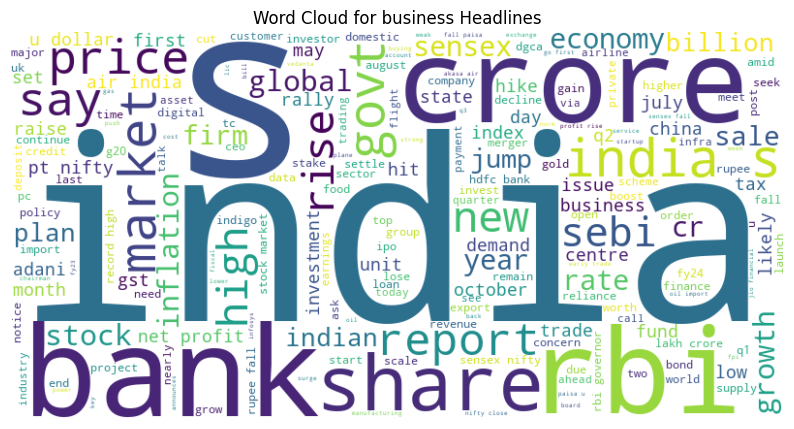

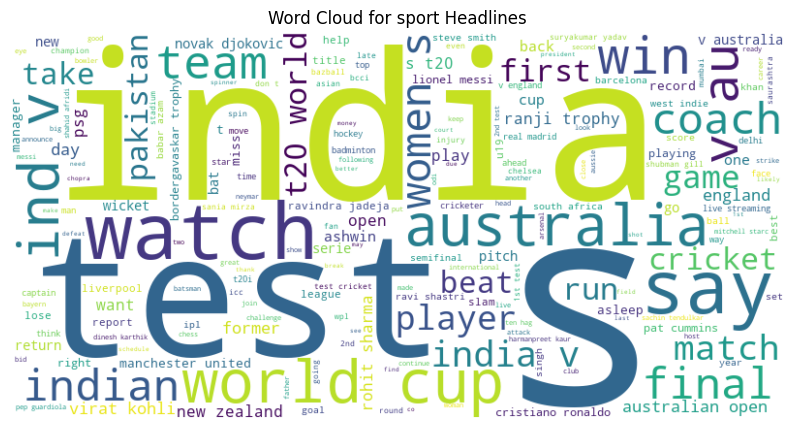

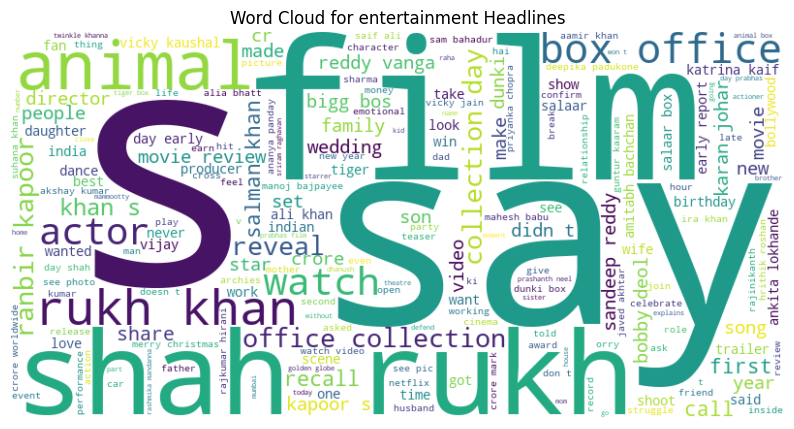

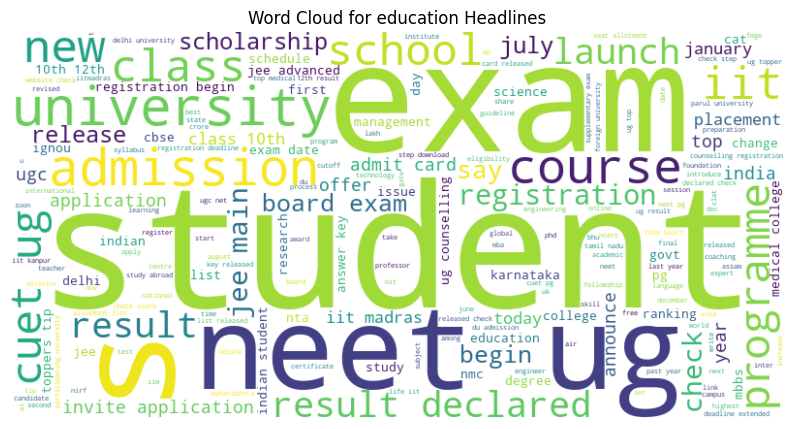

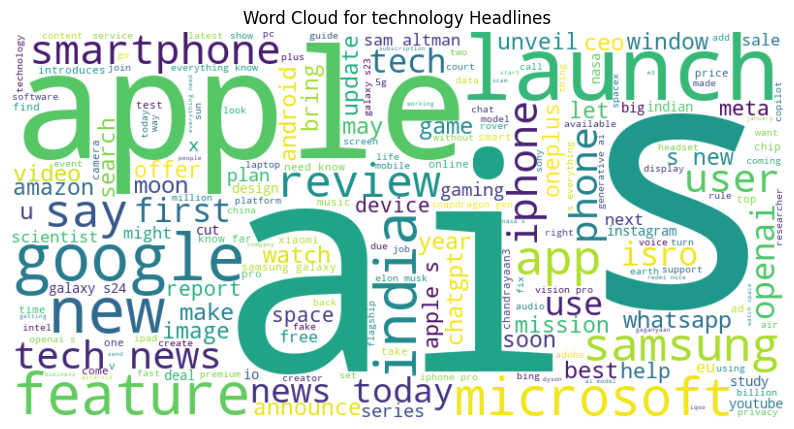

In [48]:
# Generate word clouds for headlines, descriptions, and content for each category
categories = train_df_copy['category'].unique()
for category in categories:
    subset = train_df_copy[train_df_copy['category'] == category]

for category in categories:
    subset = train_df_copy[train_df_copy['category'] == category]
    
    text = ' '.join(subset['headlines'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category} Headlines')
    plt.show()


1. We get the unique news categories.
2. For each category, we extract the headlines.
3. We combine these headlines into a single string.
4. We create a word cloud from this string.
5. We display the word cloud with a title indicating the category.

so in a simplier term we aim to understand the key themes in news headlines across various categories by visualizing their most common words.

## 5.4 Adding Text Length Columns
#### First, let's calculate the lengths of the text in the 'headlines', 'description', and 'content' columns and add them to the DataFrame:

In [49]:
# Calculate the length of text in each column
train_df_copy['headline_length'] = train_df_copy['headlines'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
train_df_copy['description_length'] = train_df_copy['description'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
train_df_copy['content_length'] = train_df_copy['content'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

### 5.4.1 Box Plots for Text Lengths
#### Box plots display the distribution of text lengths and highlight the presence of outliers for the 'headlines', 'description', and 'content' columns.

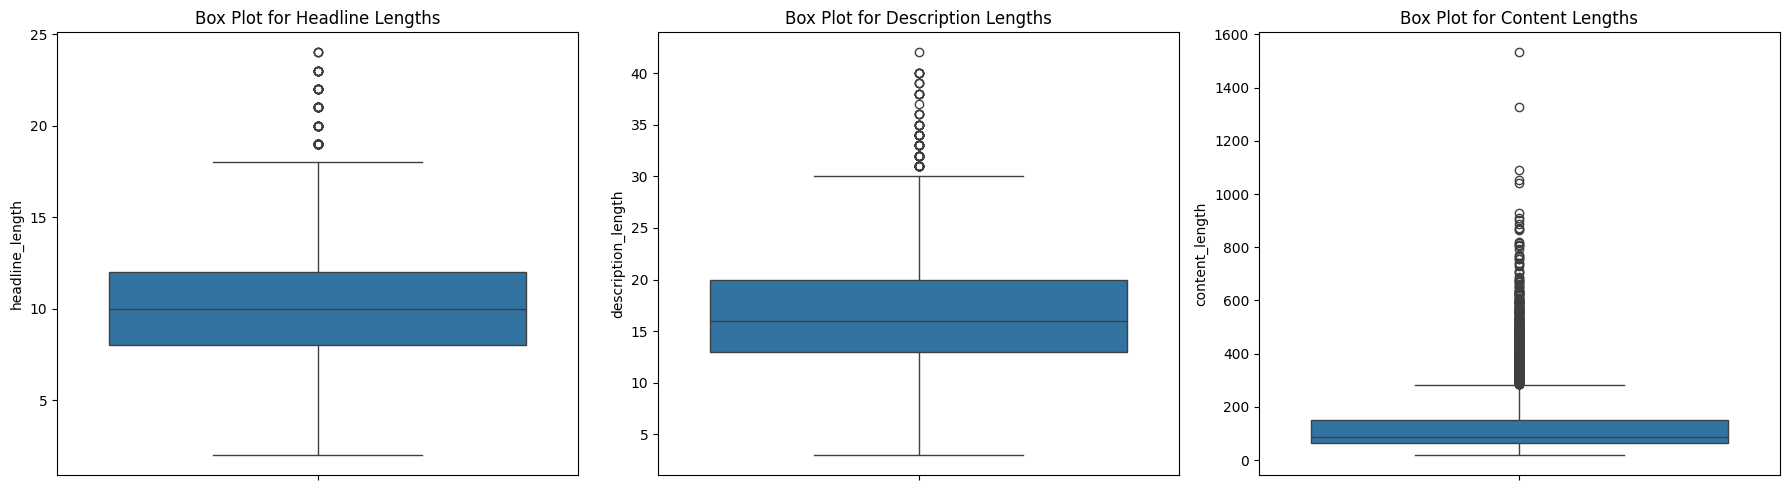

In [50]:
# Box plot for headline lengths
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=train_df_copy['headline_length'])
plt.title('Box Plot for Headline Lengths')

plt.subplot(1, 3, 2)
sns.boxplot(y=train_df_copy['description_length'])
plt.title('Box Plot for Description Lengths')

plt.subplot(1, 3, 3)
sns.boxplot(y=train_df_copy['content_length'])
plt.title('Box Plot for Content Lengths')

plt.tight_layout()
plt.show()

### 5.4.2 Pair Plot of Text Lengths
#### Pair plots visualize the pairwise relationships between the lengths of text in 'headlines', 'description', and 'content'.

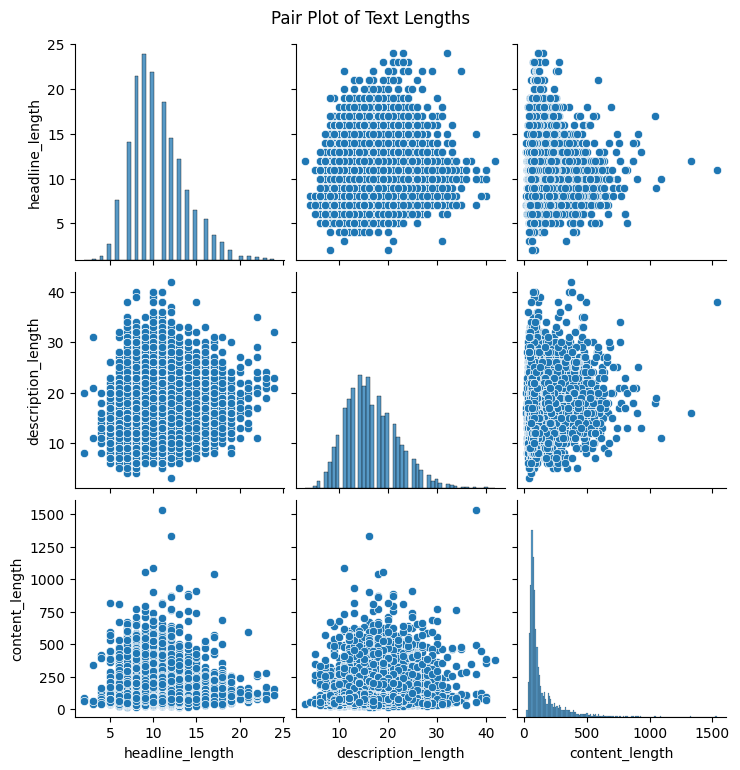

In [51]:
# Pair Plot of Text Lengths
sns.pairplot(train_df_copy[['headline_length', 'description_length', 'content_length']])
plt.suptitle('Pair Plot of Text Lengths', y=1.02)
plt.show()

### 5.4.3 Text Length Distribution by Category
##### Analyze the distribution of text length across different categories:

In [52]:
# Add columns for text length
train_df_copy['headlines_length'] = train_df_copy['headlines'].apply(lambda x: len(str(x).split()))
train_df_copy['description_length'] = train_df_copy['description'].apply(lambda x: len(str(x).split()))
train_df_copy['content_length'] = train_df_copy['content'].apply(lambda x: len(str(x).split()))

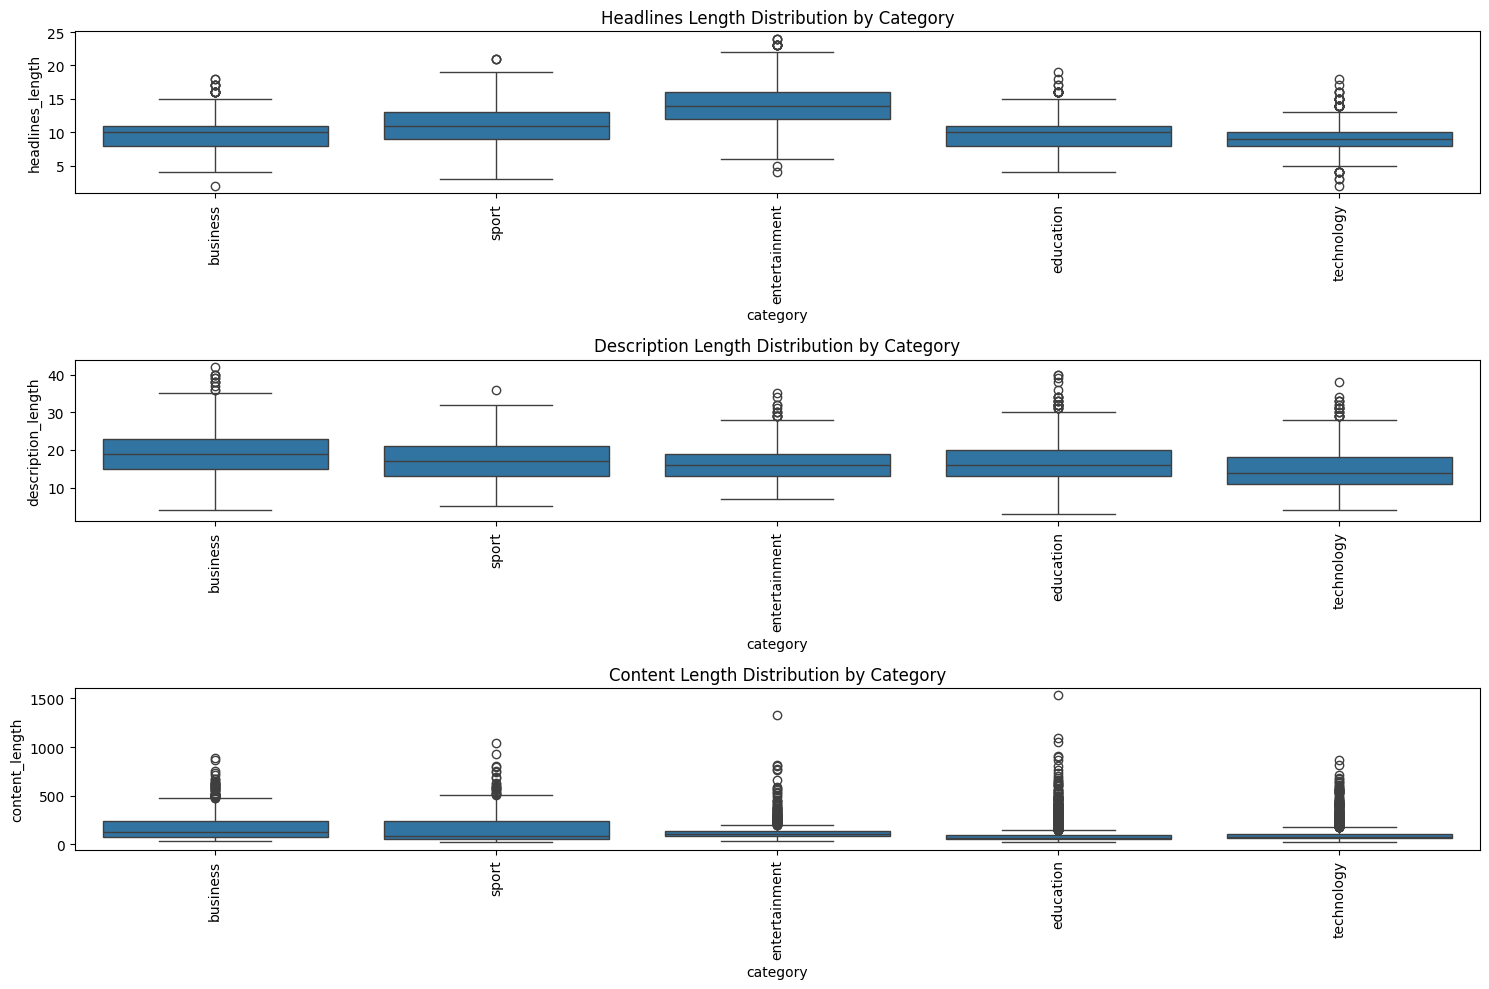

In [53]:
# Plot text length distribution by category
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.boxplot(x='category', y='headlines_length', data=train_df_copy)
plt.title('Headlines Length Distribution by Category')
plt.xticks(rotation=90)

plt.subplot(3, 1, 2)
sns.boxplot(x='category', y='description_length', data=train_df_copy)
plt.title('Description Length Distribution by Category')
plt.xticks(rotation=90)

plt.subplot(3, 1, 3)
sns.boxplot(x='category', y='content_length', data=train_df_copy)
plt.title('Content Length Distribution by Category')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### <a href=#cont>Back to Table of Contents</a>

---

## <span style="color:#0077be"><b>6.Data Preprocessing and Model Training <a class="anchor" id="chapter6"></a>

In [54]:
def data_preprocess(test_df_copy):
    # Handle missing values: Drop rows with missing values in critical columns
    test_df_copy = test_df_copy.dropna(subset=['headlines', 'description', 'content', 'category'])

    # Encode categorical variables: Convert categories to numerical codes
    test_df_copy['category'] =test_df_copy ['category'].astype('category').cat.codes

    # Text preprocessing: Simple cleaning function
    def clean_text(text):
        text = text.lower()  # Convert to lowercase
        text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove special characters
        return text

    # Apply text cleaning to text columns
    test_df_copy ['headlines'] = test_df_copy ['headlines'].apply(clean_text)
    test_df_copy ['description'] = test_df_copy['description'].apply(clean_text)
    test_df_copy ['content'] = test_df_copy ['content'].apply(clean_text)

    # Remove duplicates
    test_df_copy  = test_df_copy.drop_duplicates()

    # Prepare features (X) and labels (y)
    X = test_df_copy [['headlines']]
    y = test_df_copy['category']

    return X, y


# Preprocess the data
X_test, y_test = data_preprocess(test_df_copy)

In [55]:
def data_preprocess(train_df_copy):
    # Handle missing values: Drop rows with missing values in critical columns
    train_df_copy= train_df_copy.dropna(subset=['headlines', 'description', 'content', 'category'])

    # Encode categorical variables: Convert categories to numerical codes
    train_df_copy['category'] = train_df_copy['category'].astype('category').cat.codes

    # Text preprocessing: Simple cleaning function
    def clean_text(text):
        text = text.lower()  # Convert to lowercase
        text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove special characters
        return text

    # Apply text cleaning to text columns
    train_df_copy ['headlines'] = train_df_copy['headlines'].apply(clean_text)
    train_df_copy ['description'] = train_df_copy ['description'].apply(clean_text)
    train_df_copy ['content'] = train_df_copy['content'].apply(clean_text)

    # Remove duplicates
    train_df_copy  = train_df_copy.drop_duplicates()

    # Prepare features (X) and labels (y)
    X = train_df_copy [['headlines']]
    y = train_df_copy ['category']

    return X, y


# Preprocess the data
X_train, y_train = data_preprocess(train_df_copy)

In [56]:
# converting the text data into numerical features.
Vectorizer= TfidfVectorizer(max_features=4000)

# Transforming the text data
X =Vectorizer.fit_transform(train_df_copy['headlines']).toarray()
y= train_df_copy['category']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9248188405797102
Classification Report:
               precision    recall  f1-score   support

     business       0.92      0.93      0.93       245
    education       0.92      0.98      0.95       274
entertainment       0.92      0.97      0.94       178
        sport       0.95      0.72      0.82       137
   technology       0.92      0.94      0.93       270

     accuracy                           0.92      1104
    macro avg       0.93      0.91      0.91      1104
 weighted avg       0.93      0.92      0.92      1104



This code initializes a Naive Bayes classifier using the MultinomialNB class and trains it on a given dataset (X_train and y_train). It then uses the trained model to predict labels for a test dataset (X_test). The model's performance is evaluated by calculating the accuracy score and generating a classification report, which includes metrics such as precision, recall, and F1-score for each class. Finally, the accuracy and classification report are printed. This process provides insights into how well the model performs on unseen data, highlighting its strengths and weaknesses in classification tasks.

The classifier model demonstrates strong performance with an overall accuracy of 92.48%. It excels particularly in the education and entertainment categories, with high recall and F1-scores. However, it struggles more with the sport category, where the recall is noticeably lower at 0.72. This suggests a need for targeted improvements, possibly by increasing the training data for sports or fine-tuning the model for this category. Overall, the model shows promising results with room for enhancement in specific areas to achieve even better classification accuracy.


In [59]:
# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9338768115942029
Classification Report:
               precision    recall  f1-score   support

     business       0.92      0.95      0.93       245
    education       0.99      0.97      0.98       274
entertainment       0.92      0.96      0.94       178
        sport       0.93      0.77      0.84       137
   technology       0.91      0.96      0.93       270

     accuracy                           0.93      1104
    macro avg       0.93      0.92      0.92      1104
 weighted avg       0.93      0.93      0.93      1104



This code snippet initializes a Logistic Regression model using LogisticRegression from sklearn.linear_model, setting max_iter to 1000 for convergence. It then trains the model on X_train and y_train data. After training, predictions are made on X_test, and the model's accuracy is computed using accuracy_score from sklearn.metrics. A detailed classification report, including precision, recall, F1-score, and support for each class, is generated using classification_report.

The classifier model has achieved an impressive accuracy of 0.9339 on the given dataset of tweets, demonstrating strong predictive performance. The precision and recall values across the five categories (business, education, entertainment, sport, and technology) are notably high, with education and entertainment categories achieving particularly outstanding f1-scores of 0.98 and 0.94, respectively. The model shows a slight variance in recall, with the sport category at 0.77, indicating some room for improvement in this area. Overall, the macro and weighted averages reflect consistent and robust performance across the dataset, highlighting the model's efficacy in accurately classifying tweets into their respective categories.

In [60]:
# Initialize KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  

# Train the Model
knn_model.fit(X_train, y_train)

# Make Predictions
y_pred = knn_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8976449275362319
Classification Report:
               precision    recall  f1-score   support

     business       0.86      0.90      0.88       245
    education       0.92      0.94      0.93       274
entertainment       0.95      0.92      0.93       178
        sport       0.79      0.88      0.83       137
   technology       0.94      0.85      0.89       270

     accuracy                           0.90      1104
    macro avg       0.89      0.90      0.89      1104
 weighted avg       0.90      0.90      0.90      1104



This code initializes a K-Nearest Neighbors (KNN) classifier using KNeighborsClassifier from sklearn.neighbors, with n_neighbors set to 5. It then trains the model on X_train and y_train data using the fit method. After training, predictions are made on X_test using the predict method. The model's accuracy is computed using accuracy_score from sklearn.metrics, and a detailed classification report is generated using classification_report.

The model achieved an overall accuracy of 89.76%, demonstrating strong performance across various categories. The classification report shows high precision and recall values, particularly in the education and entertainment categories, indicating the model's reliability in correctly identifying tweets in these areas. Business and technology categories also show robust results, although there is a slight dip in recall for technology tweets. The sport category, while still performing well, has the lowest precision and recall, suggesting room for improvement. Overall, the model's balanced performance across categories highlights its effectiveness in predicting tweet toxicity.

In [61]:
# Initialize SVM Classifier
svm_model = SVC(kernel='linear') 

# Train the Model
svm_model.fit(X_train, y_train)

# Make Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9365942028985508
Classification Report:
               precision    recall  f1-score   support

     business       0.90      0.93      0.92       245
    education       0.98      0.96      0.97       274
entertainment       0.94      0.96      0.95       178
        sport       0.92      0.85      0.88       137
   technology       0.93      0.95      0.94       270

     accuracy                           0.94      1104
    macro avg       0.93      0.93      0.93      1104
 weighted avg       0.94      0.94      0.94      1104



This code initializes a Support Vector Machine (SVM) classifier using SVC from sklearn.svm, with a linear kernel specified by kernel='linear', which is commonly used for text classification tasks. It then trains the SVM model on X_train and y_train data using the fit method. After training, predictions are made on X_test using the predict method. The accuracy of the model is computed using accuracy_score from sklearn.metrics, and a detailed classification report is generated using classification_report.

The classifier achieved an impressive accuracy of 0.937, indicating strong overall performance. The precision, recall, and F1-scores across different categories, such as business, education, entertainment, sport, and technology, demonstrate consistent and high performance, with particularly strong results in education and entertainment. The macro and weighted averages of the metrics confirm the model's reliability and robustness in predicting tweet toxicity accurately across all categories. This performance highlights the model's effectiveness in handling the diverse nature of tweet content.

In [62]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8632246376811594
Classification Report:
               precision    recall  f1-score   support

     business       0.87      0.84      0.86       245
    education       0.95      0.93      0.94       274
entertainment       0.87      0.87      0.87       178
        sport       0.63      0.78      0.70       137
   technology       0.91      0.85      0.88       270

     accuracy                           0.86      1104
    macro avg       0.85      0.86      0.85      1104
 weighted avg       0.87      0.86      0.87      1104



This code initializes a Random Forest classifier using RandomForestClassifier from sklearn.ensemble, with n_estimators set to 100 for the number of trees in the forest and random_state set to 42 for reproducibility. It then trains the Random Forest model on X_train and y_train data using the fit method. After training, predictions are made on X_test using the predict method. The accuracy of the model is computed using accuracy_score from sklearn.metrics, and a detailed classification report is generated using classification_report. 

The classifier model achieved an overall accuracy of 86.32%, performing particularly well in the education (F1-score: 0.94) and technology (F1-score: 0.88) categories. While the model showed strong precision and recall across most categories, it exhibited lower performance in the sport category (F1-score: 0.70). The weighted average F1-score of 0.87 indicates the model's robustness in handling the diverse dataset.


## Performance Comparison of Machine Learning Models: Accuracy, Recall, and F1-Score

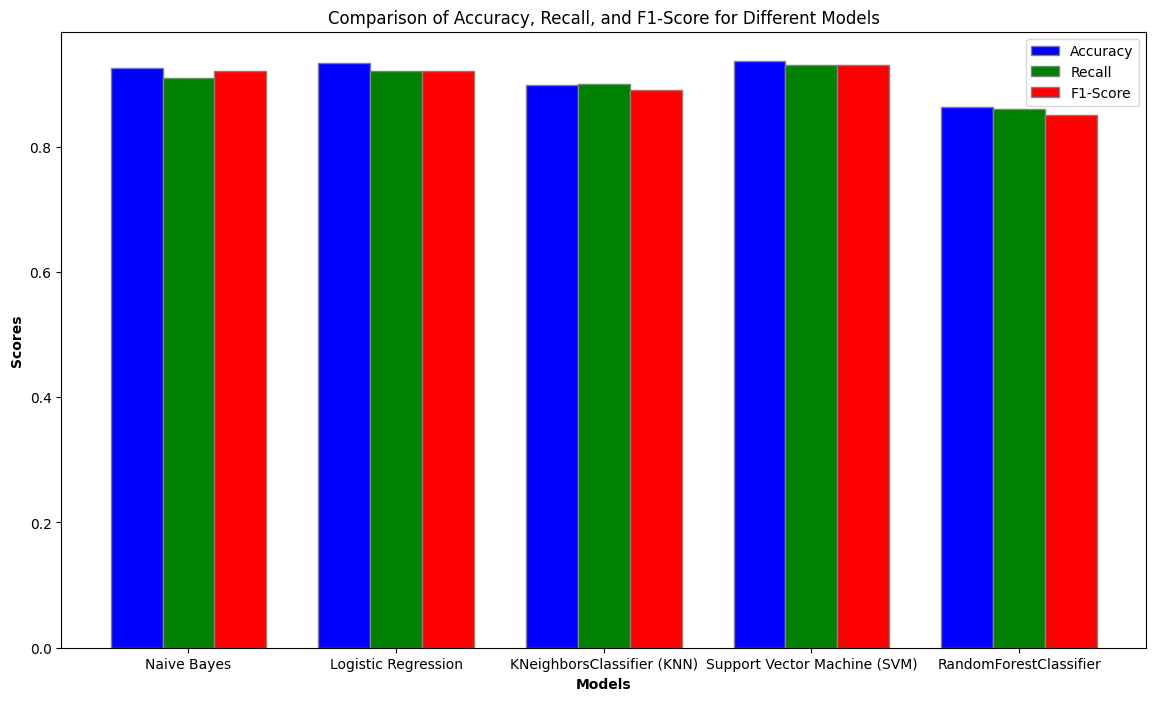

In [63]:
# Data for the plots
models = ['Naive Bayes', 'Logistic Regression', 'KNeighborsClassifier (KNN)', 'Support Vector Machine (SVM)', 'RandomForestClassifier']
accuracy = [0.9248188405797102, 0.9338768115942029, 0.8976449275362319, 0.9365942028985508, 0.8632246376811594]

recall = [0.91, 0.92, 0.90, 0.93, 0.86]  # macro avg recall from each model
f1_score = [0.92, 0.92, 0.89, 0.93, 0.85]  # macro avg f1-score from each model

# Bar width
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bars
plt.figure(figsize=(14, 8))
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add title
plt.title('Comparison of Accuracy, Recall, and F1-Score for Different Models')

# Add legend
plt.legend()

# Show the plot
plt.show()


## <span style="color:#0077be"><b> 7.Model Tuning<a class="anchor" id="chapter7"></a>

## Naive Bayes model

In [64]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Initialize the GridSearchCV with MultinomialNB and the parameter grid
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_nb_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_nb_model.predict(X_test)

# Evaluate the best model
best_accuracy = accuracy_score(y_test, y_pred)
best_report = classification_report(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Accuracy: {best_accuracy}")
print(f"Classification Report for Best Model:\n{best_report}")


Best Hyperparameters: {'alpha': 0.1}
Best Accuracy: 0.9329710144927537
Classification Report for Best Model:
               precision    recall  f1-score   support

     business       0.93      0.91      0.92       245
    education       0.94      0.97      0.96       274
entertainment       0.94      0.98      0.96       178
        sport       0.92      0.87      0.89       137
   technology       0.94      0.91      0.93       270

     accuracy                           0.93      1104
    macro avg       0.93      0.93      0.93      1104
 weighted avg       0.93      0.93      0.93      1104



## Logistic Regression model

In [65]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  
}

# Initialize the GridSearchCV with LogisticRegression and the parameter grid
grid_search = GridSearchCV(LogisticRegression(max_iter=10), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [66]:
# Get the best model
best_lr_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_lr_model.predict(X_test)

In [67]:
# Evaluate the best model
best_accuracy = accuracy_score(y_test, y_pred)
best_report = classification_report(y_test, y_pred)

In [68]:

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Accuracy: {best_accuracy}")
print(f"Classification Report for Best Model:\n{best_report}")

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.9402173913043478
Classification Report for Best Model:
               precision    recall  f1-score   support

     business       0.92      0.95      0.93       245
    education       0.99      0.96      0.98       274
entertainment       0.93      0.97      0.95       178
        sport       0.92      0.82      0.87       137
   technology       0.93      0.95      0.94       270

     accuracy                           0.94      1104
    macro avg       0.94      0.93      0.93      1104
 weighted avg       0.94      0.94      0.94      1104



## KNN Classifier

In [69]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize the GridSearchCV with KNeighborsClassifier and the parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [70]:
# Get the best model
best_knn_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_knn_model.predict(X_test)


In [71]:
# Evaluate the best model
best_accuracy = accuracy_score(y_test, y_pred)
best_report = classification_report(y_test, y_pred)

In [72]:
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Accuracy: {best_accuracy}")
print(f"Classification Report for Best Model:\n{best_report}")

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best Accuracy: 0.9221014492753623
Classification Report for Best Model:
               precision    recall  f1-score   support

     business       0.91      0.91      0.91       245
    education       0.95      0.96      0.96       274
entertainment       0.95      0.96      0.95       178
        sport       0.86      0.87      0.87       137
   technology       0.91      0.90      0.91       270

     accuracy                           0.92      1104
    macro avg       0.92      0.92      0.92      1104
 weighted avg       0.92      0.92      0.92      1104



## ML Flow

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import mlflow
import mlflow.sklearn

# Assuming train_df_copy is your DataFrame containing the data
X = train_df_copy['headlines'].astype(str)]
y = train_df_copy['category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define pipelines for each model
pipelines = {
    'MultinomialNB': Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())]),
    'LogisticRegression': Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression(max_iter=10000))]),
    'KNeighbors': Pipeline([('tfidf', TfidfVectorizer()), ('clf', KNeighborsClassifier())])
}

# Define hyperparameter grids
param_grids = {
    'MultinomialNB': {
        'tfidf__max_df': [0.75, 1.0],
        'tfidf__min_df': [1, 5],
        'tfidf__max_features': [None, 500],
        'clf__alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
    },
    'LogisticRegression': {
        'tfidf__max_df': [0.75, 1.0],
        'tfidf__min_df': [1, 5],
        'tfidf__max_features': [None, 500],
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__penalty': ['l1', 'l2'],
        'clf__solver': ['liblinear', 'saga']
    },
    'KNeighbors': {
        'tfidf__max_df': [0.75, 1.0],
        'tfidf__min_df': [1, 5],
        'tfidf__max_features': [None, 500],
        'clf__n_neighbors': [3, 5, 7, 9, 11],
        'clf__weights': ['uniform', 'distance'],
        'clf__metric': ['euclidean', 'manhattan', 'minkowski']
    }
}

# Define and execute GridSearchCV for each model
best_models = {}
for model_name in pipelines:
    grid_search = GridSearchCV(
        estimator=pipelines[model_name], 
        param_grid=param_grids[model_name], 
        cv=5, 
        scoring='accuracy', 
        verbose=2, 
        n_jobs=-1
    )
    
    with mlflow.start_run(run_name=f"Grid Search {model_name}"):
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        best_models[model_name] = best_model
        
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.sklearn.log_model(best_model, f"model_{model_name}")
        
        print(f"Best parameters for {model_name}: ", grid_search.best_params_)
        print(f"Test set accuracy for {model_name}: ", accuracy)
        print(f"Classification report for {model_name}:\n", report)


#### <a href=#cont>Back to Table of Contents</a>

---

## <span style="color:#0077be"><b>8.Conclusion <a class="anchor" id="chapter8"></a>

  This project successfully demonstrates the application of machine learning techniques to classify news articles. By following a structured workflow that includes data loading, preprocessing, model training, evaluation, and deployment, we achieved significant progress in automating the classification process for news articles. Our models, which include Naive Bayes, Random Forest, Logistic Regression, and SVM, were trained on a dataset of 5,600 labeled articles. Through rigorous data cleaning, exploratory data analysis, and model tuning, we ensured the accuracy and robustness of our classifiers.

##  <span style="color:#0077be"><b>9.References <a class="anchor" id="chapter9"></a>

1.Bird, S., Klein, E., & Loper, E. (2009). Natural Language Processing with Python. O'Reilly Media, Inc.


2.Streamlit Documentation. (n.d.). Retrieved from Streamlit.io.

#### <a href=#cont>Back to Table of Contents</a>

---